In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
file = 'financial_data.csv'
data = pd.read_csv(file)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Revenue   1000 non-null   int64 
 2   Expenses  1000 non-null   int64 
 3   Profit    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [130]:
from dateutil import parser

data['Date'] = data['Date'].map(parser.parse)

In [131]:
#Hitung rata-rata, median, maksimum, minimum, dan standar deviasi dari pendapatan (Revenue), biaya (Expenses), dan laba (Profit).

statistics = {
    'Metric': ['Revenue', 'Expenses', 'Profit'],
    'Mean': [data['Revenue'].mean(), data['Expenses'].mean(), data['Profit'].mean()],
    'Median': [data['Revenue'].median(), data['Expenses'].median(), data['Profit'].median()],
    'Max': [data['Revenue'].max(), data['Expenses'].max(), data['Profit'].max()],
    'Min': [data['Revenue'].min(), data['Expenses'].min(), data['Profit'].min()],
    'Std Dev': [data['Revenue'].std(), data['Expenses'].std(), data['Profit'].std()]
}

In [132]:
df = pd.DataFrame(statistics)
df.set_index('Metric', inplace=True)

df

,Mean,Median,Max,Min,Std Dev
Metric,,,,,
Revenue,12311.360,12179.5,19989,5023,4362.996684
Expenses,5979.476,5965.0,9999,2004,2342.899236
Profit,6331.884,6286.0,17869,-4022,4969.539125


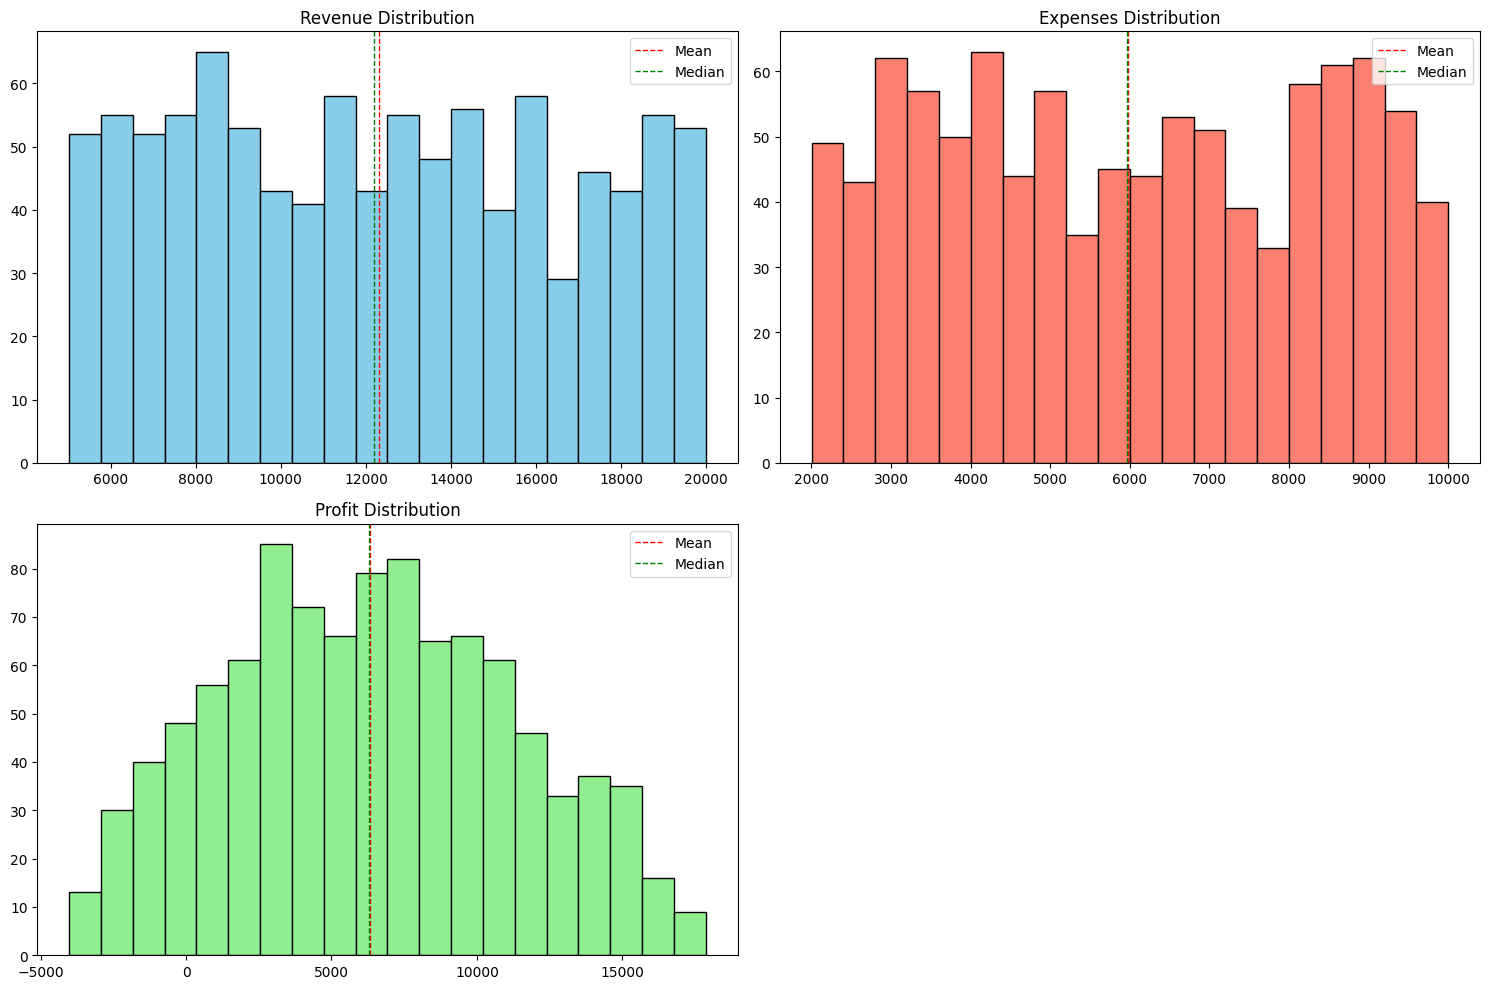

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(data['Revenue'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Revenue Distribution')
axes[0, 0].axvline(data['Revenue'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 0].axvline(data['Revenue'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
axes[0, 0].legend()

axes[0, 1].hist(data['Expenses'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Expenses Distribution')
axes[0, 1].axvline(data['Expenses'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 1].axvline(data['Expenses'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
axes[0, 1].legend()

axes[1, 0].hist(data['Profit'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Profit Distribution')
axes[1, 0].axvline(data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[1, 0].axvline(data['Profit'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
axes[1, 0].legend()

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

In [134]:
data['Date'] = pd.to_datetime(data['Date'])
data_2023 = data[data['Date'].dt.year == 2023]
data_2023['Month'] = data_2023['Date'].dt.to_period('M')
monthly_data = data_2023.groupby('Month').agg({'Revenue': 'sum', 'Profit': 'sum'}).reset_index()

print(monthly_data)

      Month  Revenue  Profit
0   2023-01  1296287  666442
1   2023-02   971880  508637
2   2023-03  1068769  569086
3   2023-04  1011152  544902
4   2023-05   952889  461561
5   2023-06   735624  366990
6   2023-07  1063433  535871
7   2023-08   984361  504072
8   2023-09   910322  464841
9   2023-10  1085513  595927
10  2023-11  1195057  616476
11  2023-12  1036073  497079


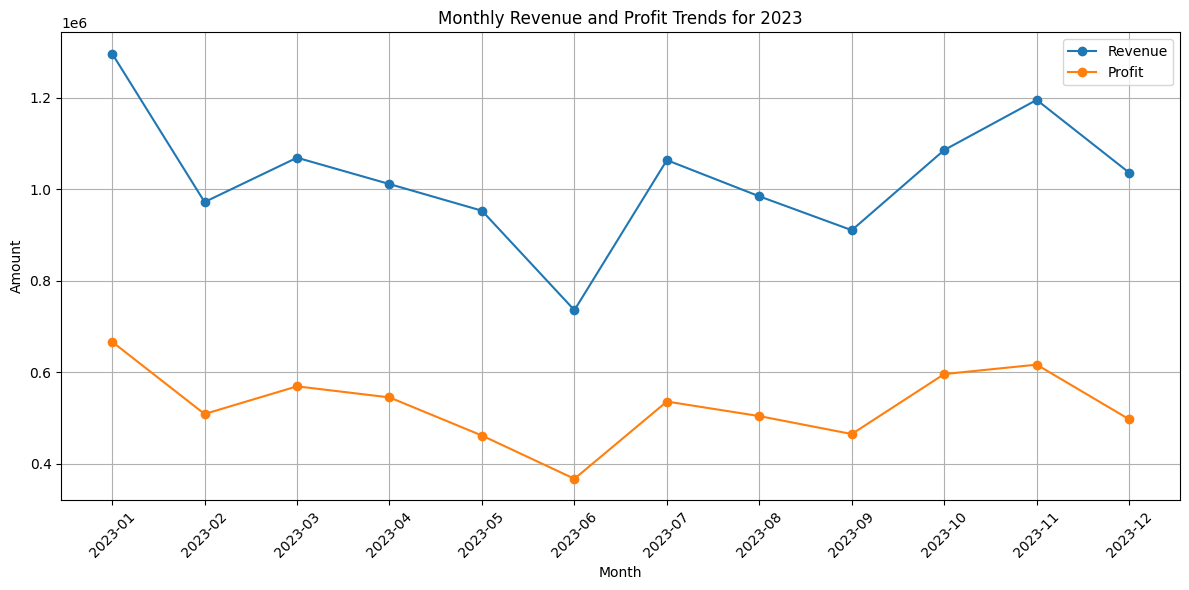

In [135]:
##Buat grafik untuk menunjukkan tren bulanan pendapatan (Revenue) dan laba (Profit) selama tahun 2023.

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['Revenue'], marker='o', label='Revenue')
plt.plot(monthly_data['Month'].astype(str), monthly_data['Profit'], marker='o', label='Profit')

plt.title('Monthly Revenue and Profit Trends for 2023')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [136]:
#Hitung rasio laba (Profit) terhadap biaya (Expenses) setiap bulan.

data['Month'] = data['Date'].dt.to_period('M')
monthly_data_rasio = data.groupby('Month').agg({'Revenue': 'sum', 'Expenses': 'sum', 'Profit': 'sum'}).reset_index()
monthly_data_rasio['Profit_to_Expenses_Ratio'] = monthly_data_rasio['Profit'] / monthly_data_rasio['Expenses']

monthly_data_rasio

,Month,Revenue,Expenses,Profit,Profit_to_Expenses_Ratio
0,2023-01,1296287,629845,666442,1.058105
1,2023-02,971880,463243,508637,1.097992
2,2023-03,1068769,499683,569086,1.138894
3,2023-04,1011152,466250,544902,1.168691
4,2023-05,952889,491328,461561,0.939415
5,2023-06,735624,368634,366990,0.995540
6,2023-07,1063433,527562,535871,1.015750
7,2023-08,984361,480289,504072,1.049518
8,2023-09,910322,445481,464841,1.043459
9,2023-10,1085513,489586,595927,1.217206


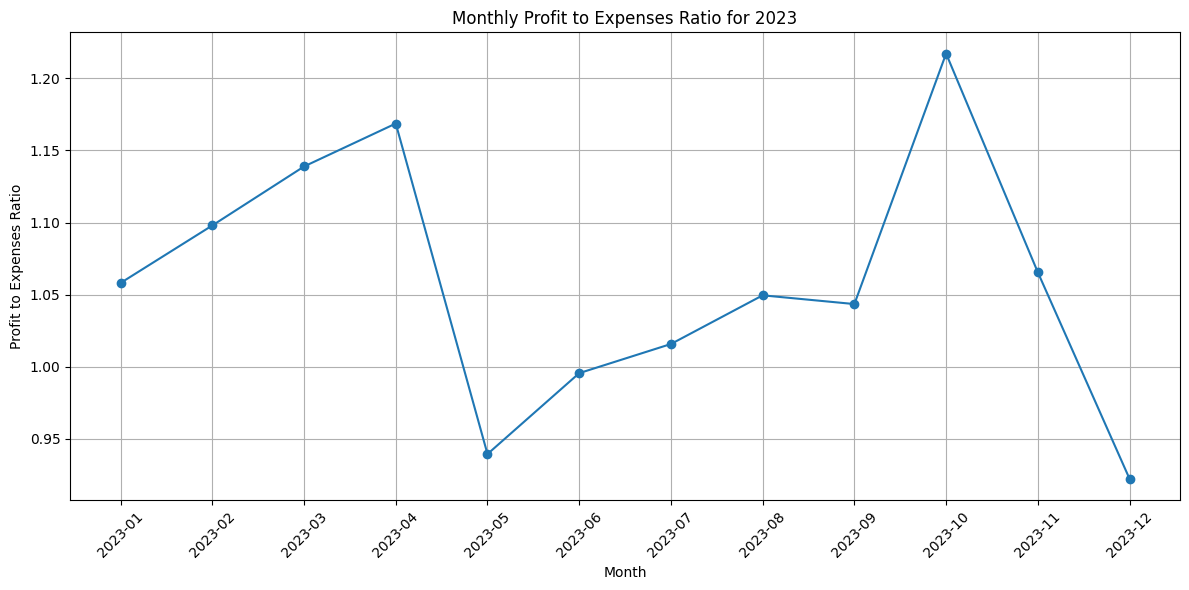

In [137]:
#Tampilkan rasio tersebut dalam bentuk grafik untuk memvisualisasikan perubahan dari bulan ke bulan.

plt.figure(figsize=(12, 6))

plt.plot(monthly_data_rasio['Month'].astype(str), monthly_data_rasio['Profit_to_Expenses_Ratio'], marker='o', label='')
plt.title('Monthly Profit to Expenses Ratio for 2023')
plt.xlabel('Month')
plt.ylabel('Profit to Expenses Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
#Lakukan analisis untuk mengetahui bulan mana dengan laba bersih tertinggi dan terendah.

monthly_data_profit = data.groupby('Month').agg({'Profit': 'sum'}).reset_index()
max_profit_month  = monthly_data_profit.loc[monthly_data_profit['Profit'].idxmax()]
min_profit_month = monthly_data_profit.loc[monthly_data_profit['Profit'].idxmin()]

max_profit_month , min_profit_month

(Month     2023-01
 Profit     666442
 Name: 0, dtype: object,
 Month     2023-06
 Profit     366990
 Name: 5, dtype: object)

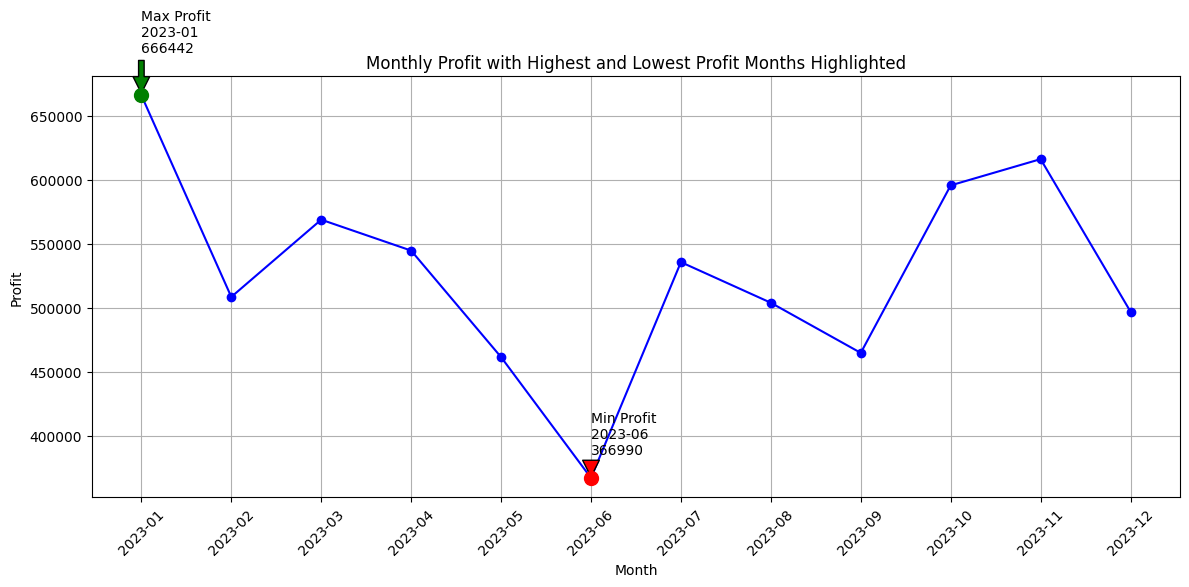

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_profit['Month'].astype(str), monthly_data_profit['Profit'], marker='o', label='Profit', color='blue')

plt.scatter(max_profit_month['Month'].strftime('%Y-%m'), max_profit_month['Profit'], color='green', s=100, zorder=5, label='Max Profit')
plt.scatter(min_profit_month['Month'].strftime('%Y-%m'), min_profit_month['Profit'], color='red', s=100, zorder=5, label='Min Profit')

plt.annotate(f"Max Profit\n{max_profit_month['Month']}\n{max_profit_month['Profit']}", 
             xy=(max_profit_month['Month'].strftime('%Y-%m'), max_profit_month['Profit']), 
             xytext=(max_profit_month['Month'].strftime('%Y-%m'), max_profit_month['Profit'] + 0.05 * max_profit_month['Profit']),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f"Min Profit\n{min_profit_month['Month']}\n{min_profit_month['Profit']}", 
             xy=(min_profit_month['Month'].strftime('%Y-%m'), min_profit_month['Profit']), 
             xytext=(min_profit_month['Month'].strftime('%Y-%m'), min_profit_month['Profit'] + 0.05 * min_profit_month['Profit']),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Monthly Profit with Highest and Lowest Profit Months Highlighted')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
#Buat model prediktif sederhana (misalnya, regresi linier) untuk memprediksi pendapatan (Revenue) berdasarkan biaya (Expenses)

X = data[['Expenses']]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [142]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [143]:
print(f'Train Mean Squared Error:: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Train Mean Squared Error:: 19480239.12300466
Test Mean Squared Error: 17172751.13780222
Train R-squared: 4.9605830097276815e-05
Test R-squared: -0.004679241461914785


In [144]:
#Gunakan model tersebut untuk memperkirakan pendapatan jika biaya diubah menjadi jumlah tertentu.

new_expenses = [[50000]] 

predicted_revenue = model.predict(new_expenses)
print(f'Predicted Revenue for Expenses {new_expenses[0][0]}: {predicted_revenue[0]}')

Predicted Revenue for Expenses 50000: 11789.172626671198


C:\Users\bahfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


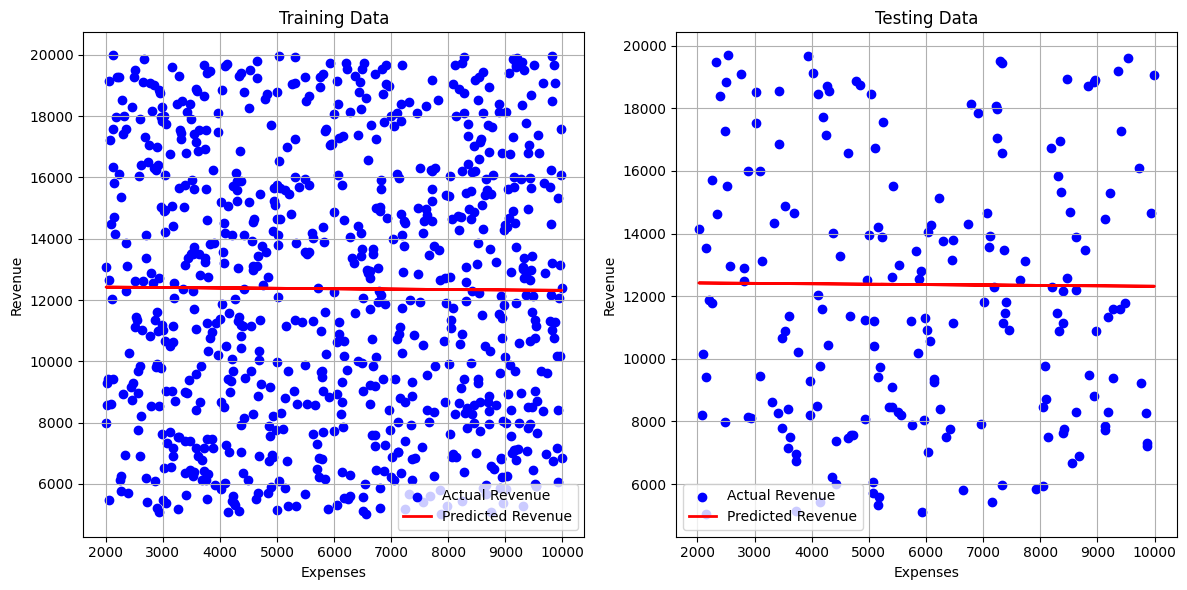

In [145]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual Revenue')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Predicted Revenue')
plt.title('Training Data')
plt.xlabel('Expenses')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Revenue')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Predicted Revenue')
plt.title('Testing Data')
plt.xlabel('Expenses')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [146]:
#Hitung koefisien korelasi antara pendapatan (Revenue) dan laba (Profit).

correlation_coefficient = data['Revenue'].corr(data['Profit'])

print(f'Koefisien Korelasi antara Pendapatan (Revenue) dan Laba (Profit): {correlation_coefficient}')

Koefisien Korelasi antara Pendapatan (Revenue) dan Laba (Profit): 0.8819005728215832


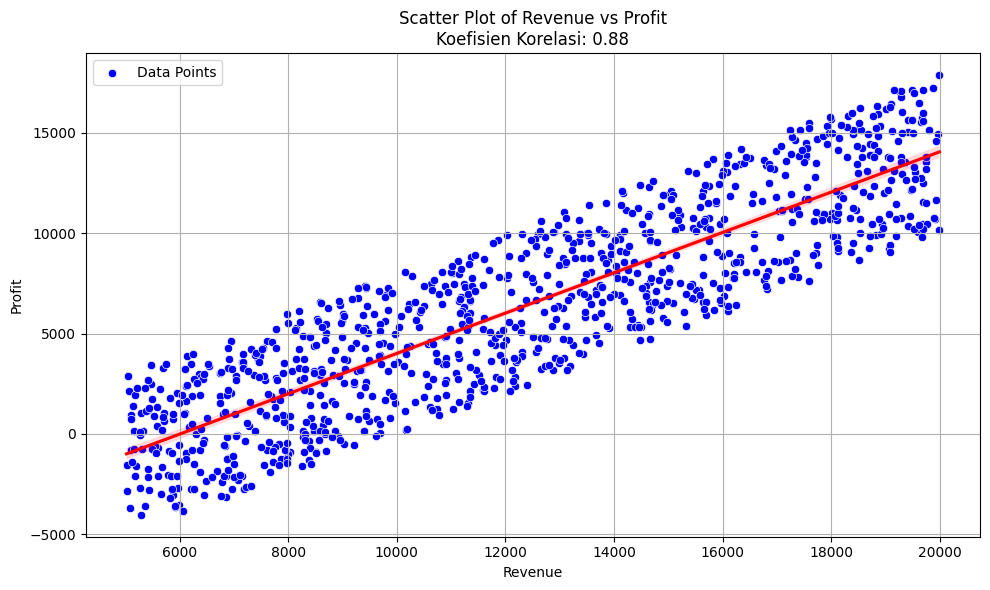

In [147]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Profit', data=data, color='blue', label='Data Points')
sns.regplot(x='Revenue', y='Profit', data=data, scatter=False, color='red', label='Regression Line')

plt.title(f'Scatter Plot of Revenue vs Profit\nKoefisien Korelasi: {correlation_coefficient:.2f}')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
#Apakah terdapat hubungan yang kuat antara pendapatan dan laba? Jelaskan.

#Jika koefisien korelasinya 0.85, ini menunjukkan hubungan yang kuat antara pendapatan dan laba. 
#Ini berarti bahwa secara umum ketika pendapatan meningkat laba juga cenderung meningkat dan sebaliknya.
#Korelasi yang tinggi menunjukkan bahwa pendapatan adalah prediktor yang baik untuk laba dalam dataset ini. 
#Sebaliknya, jika nilai korelasinya rendah, ini menunjukkan bahwa pendapatan dan laba tidak memiliki hubungan linear yang kuat.")

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Revenue   1000 non-null   int64         
 2   Expenses  1000 non-null   int64         
 3   Profit    1000 non-null   int64         
 4   Month     1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(3), period[M](1)
memory usage: 39.2 KB


In [150]:
#Identifikasi dan jelaskan adanya outlier (pencilan) dalam data pendapatan (Revenue) atau biaya (Expenses).

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [151]:
outliers_revenue, lower_bound_revenue, upper_bound_revenue = identify_outliers_iqr(data, 'Revenue')
print(f'Outliers in Revenue:\n{outliers_revenue}')

outliers_expenses, lower_bound_expenses, upper_bound_expenses = identify_outliers_iqr(data, 'Expenses')
print(f'Outliers in Expenses:\n{outliers_expenses}')

Outliers in Revenue:
Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Month]
Index: []
Outliers in Expenses:
Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Month]
Index: []


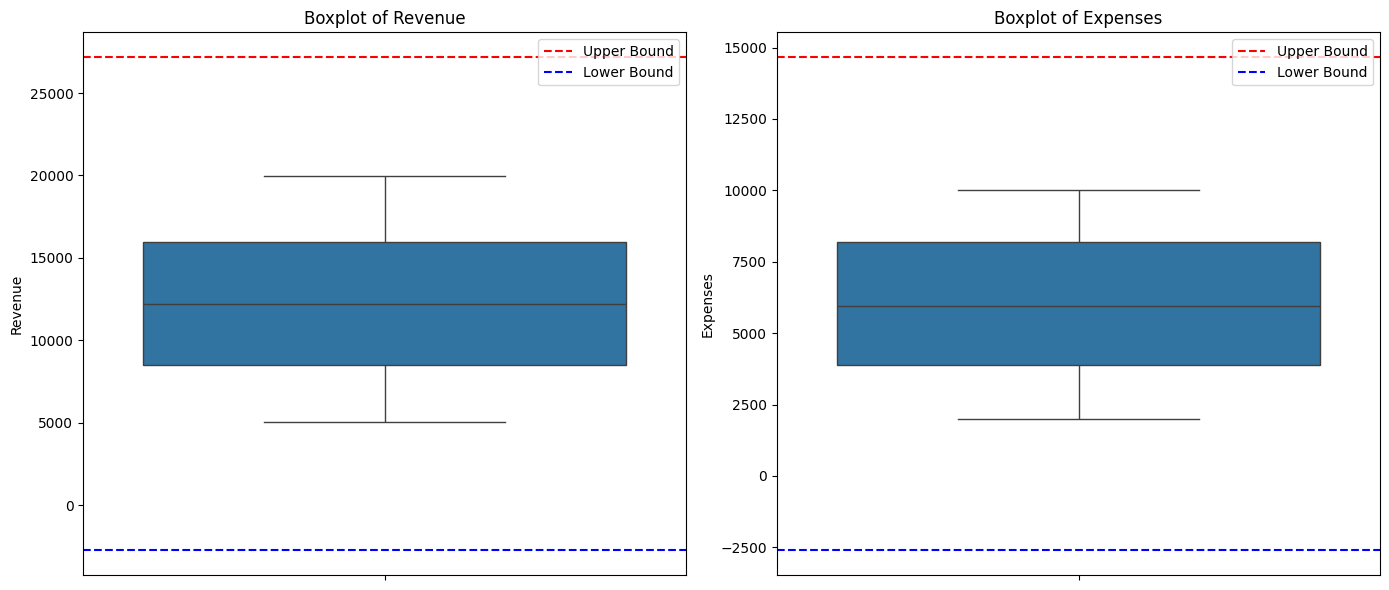

In [152]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Revenue'])
plt.title('Boxplot of Revenue')
plt.ylabel('Revenue')
plt.axhline(y=upper_bound_revenue, color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound_revenue, color='b', linestyle='--', label='Lower Bound')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Expenses'])
plt.title('Boxplot of Expenses')
plt.ylabel('Expenses')
plt.axhline(y=upper_bound_expenses, color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound_expenses, color='b', linestyle='--', label='Lower Bound')
plt.legend()

plt.tight_layout()
plt.show()

In [153]:
#Outlier dapat memberikan wawasan penting tentang data, termasuk identifikasi anomali atau peristiwa yang tidak biasa. 
#Dalam analisis keuangan, memahami dan menangani outliers adalah langkah penting untuk memastikan keakuratan dan relevansi analisis data.
#Outliers yang valid mungkin menunjukkan peluang atau risiko yang perlu ditangani, sementara outliers yang disebabkan oleh kesalahan data
#harus diperbaiki untuk analisis yang lebih akurat.

In [154]:
data_2023 = data[data['Date'].dt.year == 2023]
data_2023['Month'] = data_2023['Date'].dt.month

In [155]:
#Buat proyeksi kinerja keuangan untuk tahun berikutnya berdasarkan tren dari tahun 2023.

X = data_2023[['Month']]
y_revenue = data_2023['Revenue']
y_expenses = data_2023['Expenses']
model_revenue = LinearRegression()
model_expenses = LinearRegression()
model_revenue.fit(X, y_revenue)
model_expenses.fit(X, y_expenses)

LinearRegression()

In [156]:
months_next_year = np.arange(1, 13).reshape(-1, 1)
predicted_revenue_next_year = model_revenue.predict(months_next_year)
predicted_expenses_next_year = model_expenses.predict(months_next_year)

C:\Users\bahfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\bahfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [157]:
projections_next_year = pd.DataFrame({
    'Month': months_next_year.flatten(),
    'Predicted_Revenue': predicted_revenue_next_year,
    'Predicted_Expenses': predicted_expenses_next_year
})

projections_next_year

,Month,Predicted_Revenue,Predicted_Expenses
0,1,12296.898283,5889.970280
1,2,12299.545010,5906.351268
2,3,12302.191737,5922.732257
3,4,12304.838464,5939.113245
4,5,12307.485191,5955.494233
5,6,12310.131919,5971.875221
6,7,12312.778646,5988.256210
7,8,12315.425373,6004.637198
8,9,12318.072100,6021.018186
9,10,12320.718827,6037.399175


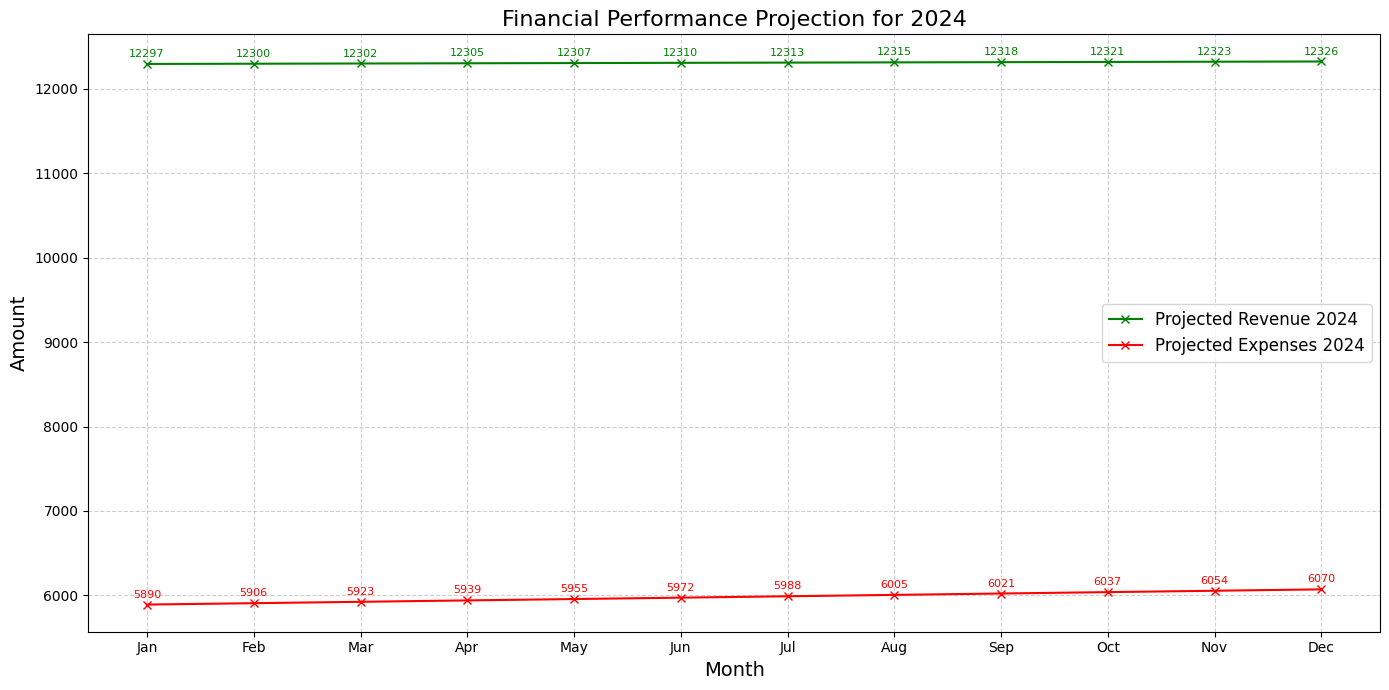

In [158]:
plt.figure(figsize=(14, 7))
plt.plot(projections_next_year['Month'], projections_next_year['Predicted_Revenue'], label='Projected Revenue 2024', marker='x', color='green', linestyle='-')
plt.plot(projections_next_year['Month'], projections_next_year['Predicted_Expenses'], label='Projected Expenses 2024', marker='x', color='red', linestyle='-')

for i, txt in enumerate(projections_next_year['Predicted_Revenue']):
    plt.annotate(f'{txt:.0f}', (projections_next_year['Month'][i], projections_next_year['Predicted_Revenue'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='green')

for i, txt in enumerate(projections_next_year['Predicted_Expenses']):
    plt.annotate(f'{txt:.0f}', (projections_next_year['Month'][i], projections_next_year['Predicted_Expenses'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='red')

plt.title('Financial Performance Projection for 2024', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [159]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [160]:
#Hitung margin keuntungan (profit margin) pada setiap bulan.

data['Profit'] = data['Revenue'] - data['Expenses']
data['Profit_Margin'] = (data['Profit'] / data['Revenue']) * 100
monthly_profit_margin = data.groupby(['Year', 'Month'])[['Revenue', 'Expenses', 'Profit', 'Profit_Margin']].mean().reset_index()

print(monthly_profit_margin)

    Year  Month       Revenue     Expenses       Profit  Profit_Margin
0   2023      1  12002.657407  5831.898148  6170.759259      43.114804
1   2023      2  12148.500000  5790.537500  6357.962500      46.670716
2   2023      3  13033.768293  6093.695122  6940.073171      45.503080
3   2023      4  12639.400000  5828.125000  6811.275000      45.474589
4   2023      5  12216.525641  6299.076923  5917.448718      40.405942
5   2023      6  12059.409836  6043.180328  6016.229508      42.842980
6   2023      7  11815.922222  5861.800000  5954.122222      41.041703
7   2023      8  12304.512500  6003.612500  6300.900000      41.584120
8   2023      9  12301.648649  6020.013514  6281.635135      42.015400
9   2023     10  12622.244186  5692.860465  6929.383721      48.389028
10  2023     11  12713.372340  6155.117021  6558.255319      46.353351
11  2023     12  11908.885057  6195.333333  5713.551724      41.981784


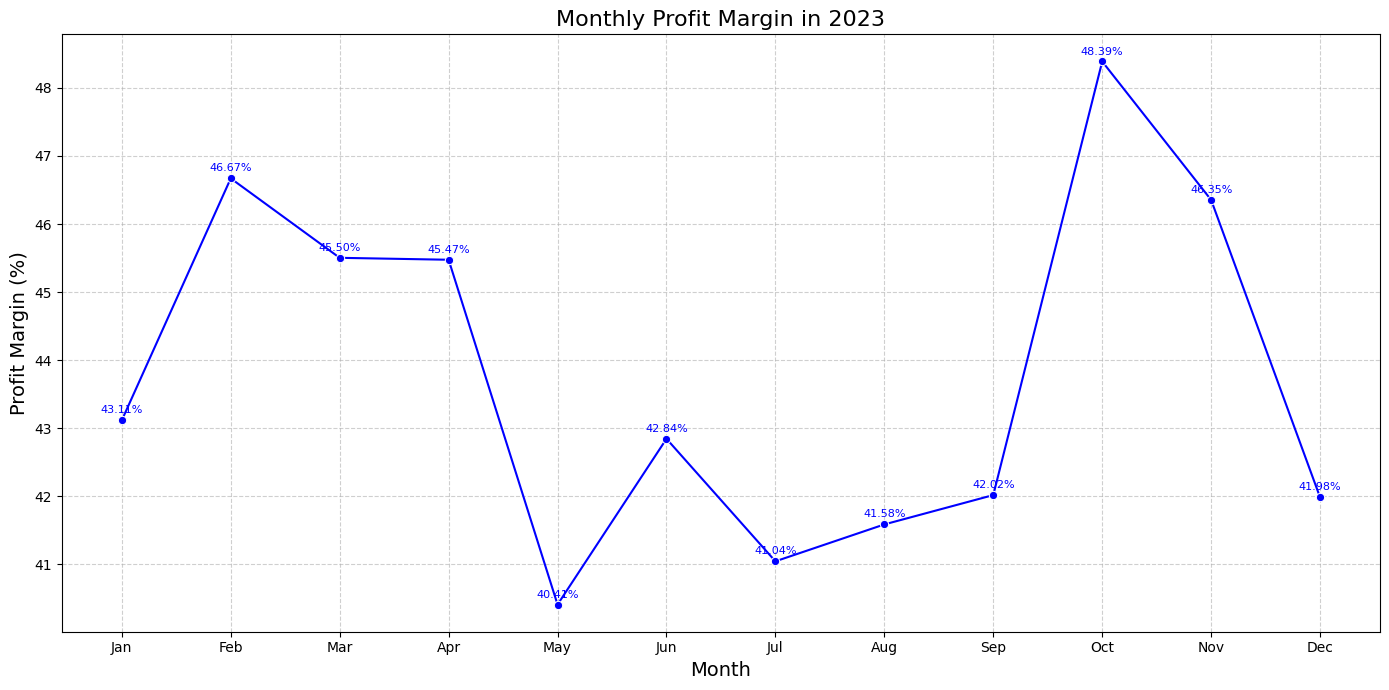

In [161]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=monthly_profit_margin, x='Month', y='Profit_Margin', marker='o', color='blue')

for i, txt in enumerate(monthly_profit_margin['Profit_Margin']):
    plt.annotate(f'{txt:.2f}%', (monthly_profit_margin['Month'][i], monthly_profit_margin['Profit_Margin'][i]), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='blue')

plt.title('Monthly Profit Margin in 2023', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()